## **STUDENTS DROPOUT AND SUCCESS | ANALYSIS AND PREDICTION**

## 📘 About the Dataset

This dataset originates from a Portuguese higher education institution and was developed as part of a national project aiming to combat student dropout and academic failure in universities.  
It contains information from **4,424 undergraduate students** across **8 degree programs**, including:

- Agronomy
- Design
- Education
- Nursing
- Journalism
- Management
- Social Service
- Technologies

---

## 🎯 Objective

The main goal is to enable **early intervention** by using machine learning models to predict a student’s academic outcome:

- **Drop out**
- **Remain Enrolled**
- **Successfully Graduate**

This is a **three-class classification problem** with a known class imbalance, offering realistic challenges for predictive modeling and education analytics.

---

## 📊 Dataset Highlights

- **Instances**: 4,424 students  
- **Features**: 36 total  
- **Types**: Integer, Categorical, Real-valued  
- Includes **demographic and academic** information  
- **Target Variable**: `'Target'` (Categorical)  
  - Classes: `Dropout`, `Enrolled`, `Graduate`

---

## 🧩 Feature Categories

### 📌 Demographics & Socioeconomic:
- Gender, Age, Marital Status
- Nationality
- Parental Education and Occupation
- Scholarship holder
- Tuition fees
- Application mode

### 📌 Academic History:
- Degree program
- Curricular units enrolled & approved
- Grades (1st and 2nd semesters)
- Admission grade
- Previous qualification

### 📌 External Factors:
- GDP at enrollment time
- Inflation rate at enrollment time

---

## 🧼 Data Preprocessing

The original researchers performed extensive cleaning and handling of:

- Outliers  
- Inconsistent entries  
- Anomalies  
- Missing values  

✅ **Final dataset contains no missing values**.

---

## 💡 Suggested Use Cases

- Educational Data Mining  
- Early Warning Systems for Student Dropout  
- Classification Benchmarking  
- Feature Importance & Interpretability Studies  
- Policy-making simulations for academic retention

---

## ⚙️ Recommended Setup

- **Task Type**: Multiclass Classification  
- **Evaluation Metrics**: Accuracy, Macro F1 Score, Confusion Matrix  
- **Suggested Split**: 80% Training / 20% Testing

---

## 📚 Citation & Source

This dataset was created under the **SATDAP - Capacitação da Administração Pública** project, funded by **POCI-05-5762-FSE-000191 (Portugal)**, and is available through the **UCI Machine Learning Repository**.


### **1. IMPORT LIBRARIES** 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings

### **2. LOAD AND EXPLORE THE DATASET**

In [36]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [37]:
df = pd.read_csv('students_dropout_academic_success.csv')
df.head(10)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [38]:
df.shape

(4424, 37)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [40]:
df.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [41]:
print ('NULL VALUES:')
print ('------------')
df.isnull().sum()

NULL VALUES:
------------


Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [42]:
print ('DUPLICATED ROWS:')
df.duplicated().sum()

DUPLICATED ROWS:


0

In [43]:
print ('UNIQUE VALUES:')
print ('--------------')
df.nunique()


UNIQUE VALUES:
--------------


Marital Status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [44]:
print ('TARGET VARIABLE VALUE COUNTS:')
print ('----------------------------')
df['target'].value_counts()

TARGET VARIABLE VALUE COUNTS:
----------------------------


target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

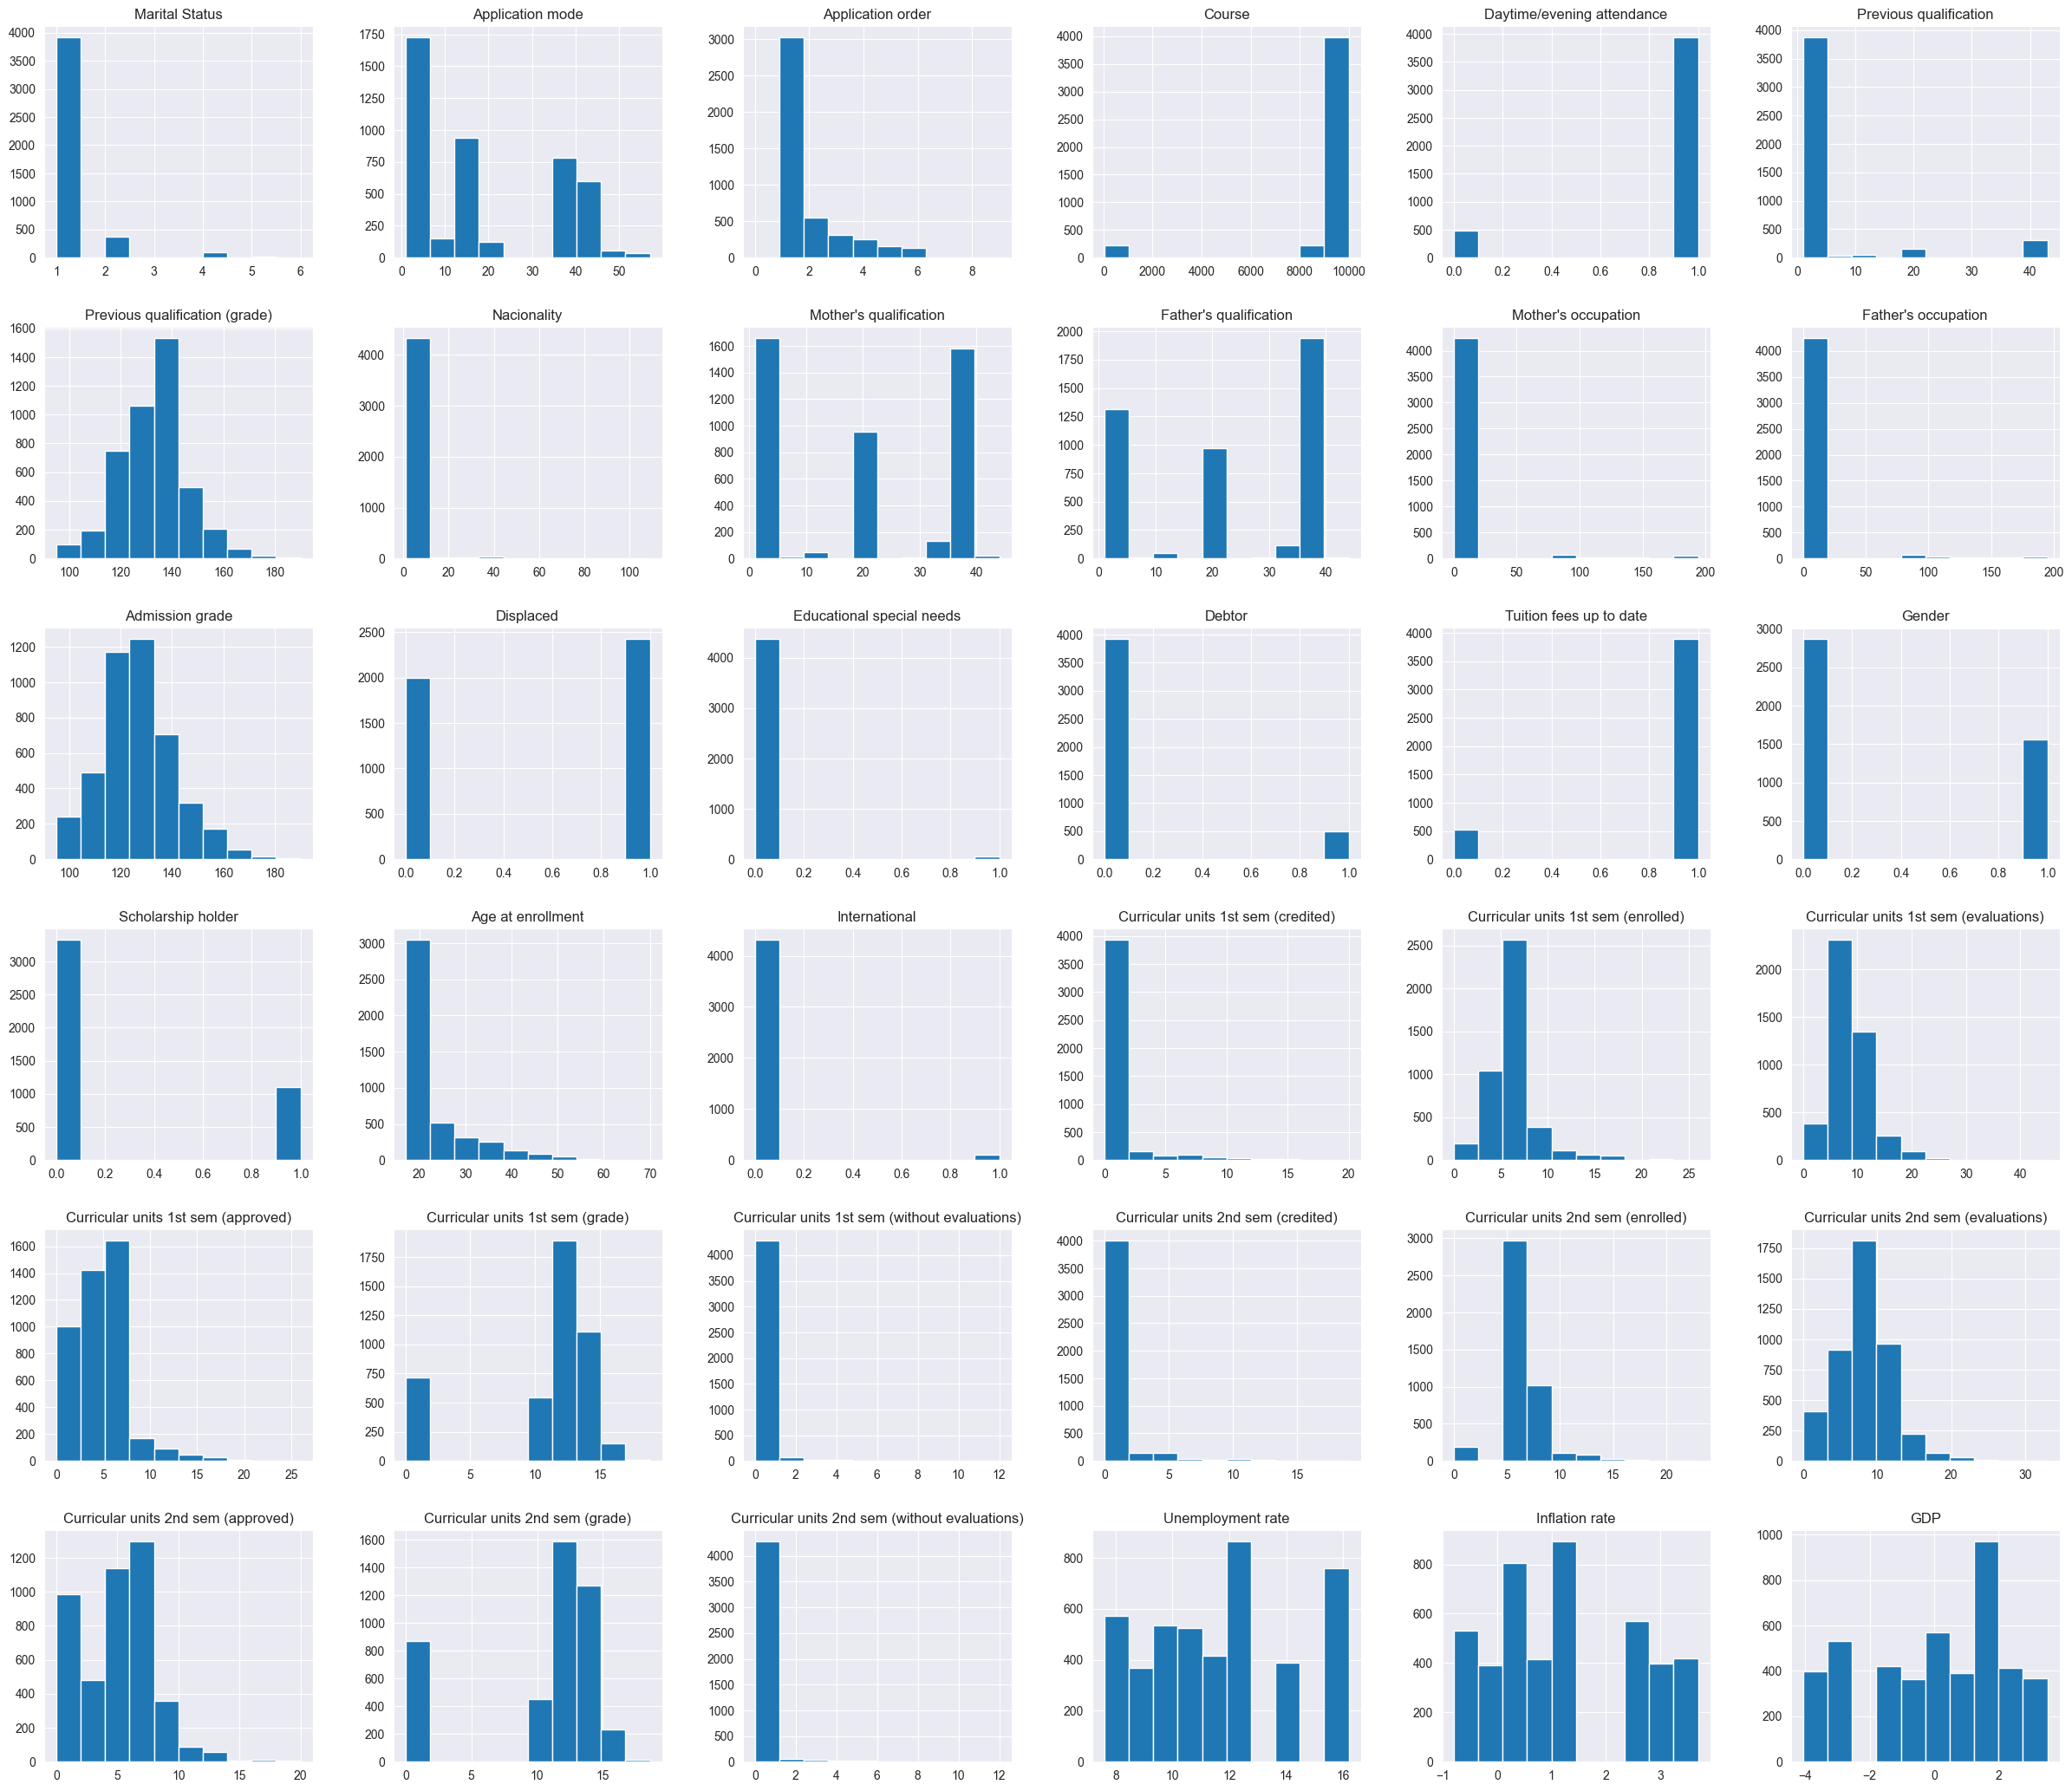

In [45]:
df.hist(figsize=(30,26))
plt.show()

In [46]:
print ('IDENTIFY CONSTANT FEATURES:')
print ('--------------------------')
for col in df:
    top_pct = df[col].value_counts(normalize=True).max()
    if top_pct > 0.90:
        print(f"{col} → {top_pct:.2%} BELONGS TO A UNIQUE DOMINANT CLASS")

IDENTIFY CONSTANT FEATURES:
--------------------------
Nacionality → 97.51% BELONGS TO A UNIQUE DOMINANT CLASS
Educational special needs → 98.85% BELONGS TO A UNIQUE DOMINANT CLASS
International → 97.51% BELONGS TO A UNIQUE DOMINANT CLASS
Curricular units 1st sem (without evaluations) → 93.35% BELONGS TO A UNIQUE DOMINANT CLASS
Curricular units 2nd sem (without evaluations) → 93.63% BELONGS TO A UNIQUE DOMINANT CLASS


### **3. CLEAN THE DATA**

In [47]:
print ('DELETED CONSTANT FEATURES....')
df.drop([
    'Nacionality',
    'Educational special needs',
    'International',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (without evaluations)'
], axis=1, inplace=True)

DELETED CONSTANT FEATURES....



TARGET DISTRIBUTION:
--------------------
Graduate: 2209
Dropout: 1421
Enrolled: 794

Dropout rate: 32.12%
Graduation rate: 49.93%
Still enrolled: 17.95%


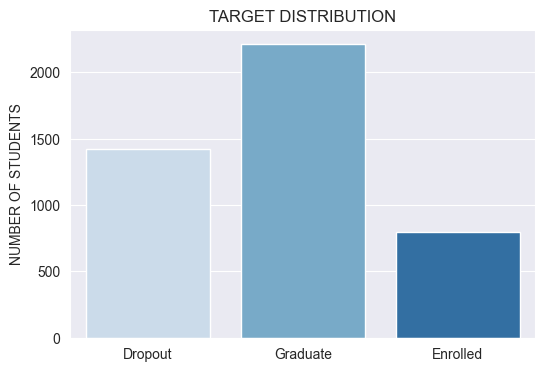

In [48]:
print("\nTARGET DISTRIBUTION:")
print ('--------------------')
target_counts = df['target'].value_counts()
for cat, count in target_counts.items():
    print(f"{cat}: {count}")
print()
print(f"Dropout rate: {target_counts['Dropout'] / len(df) * 100:.2f}%")
print(f"Graduation rate: {target_counts['Graduate'] / len(df) * 100:.2f}%")
print(f"Still enrolled: {target_counts['Enrolled'] / len(df) * 100:.2f}%")

sns.set_style("darkgrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='Blues')
plt.title('TARGET DISTRIBUTION')
plt.xlabel(' ')
plt.ylabel('NUMBER OF STUDENTS')
plt.show()

### **4. ANALYZE AND HANDLE FEATURE CORRELATIONS** 

In [49]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

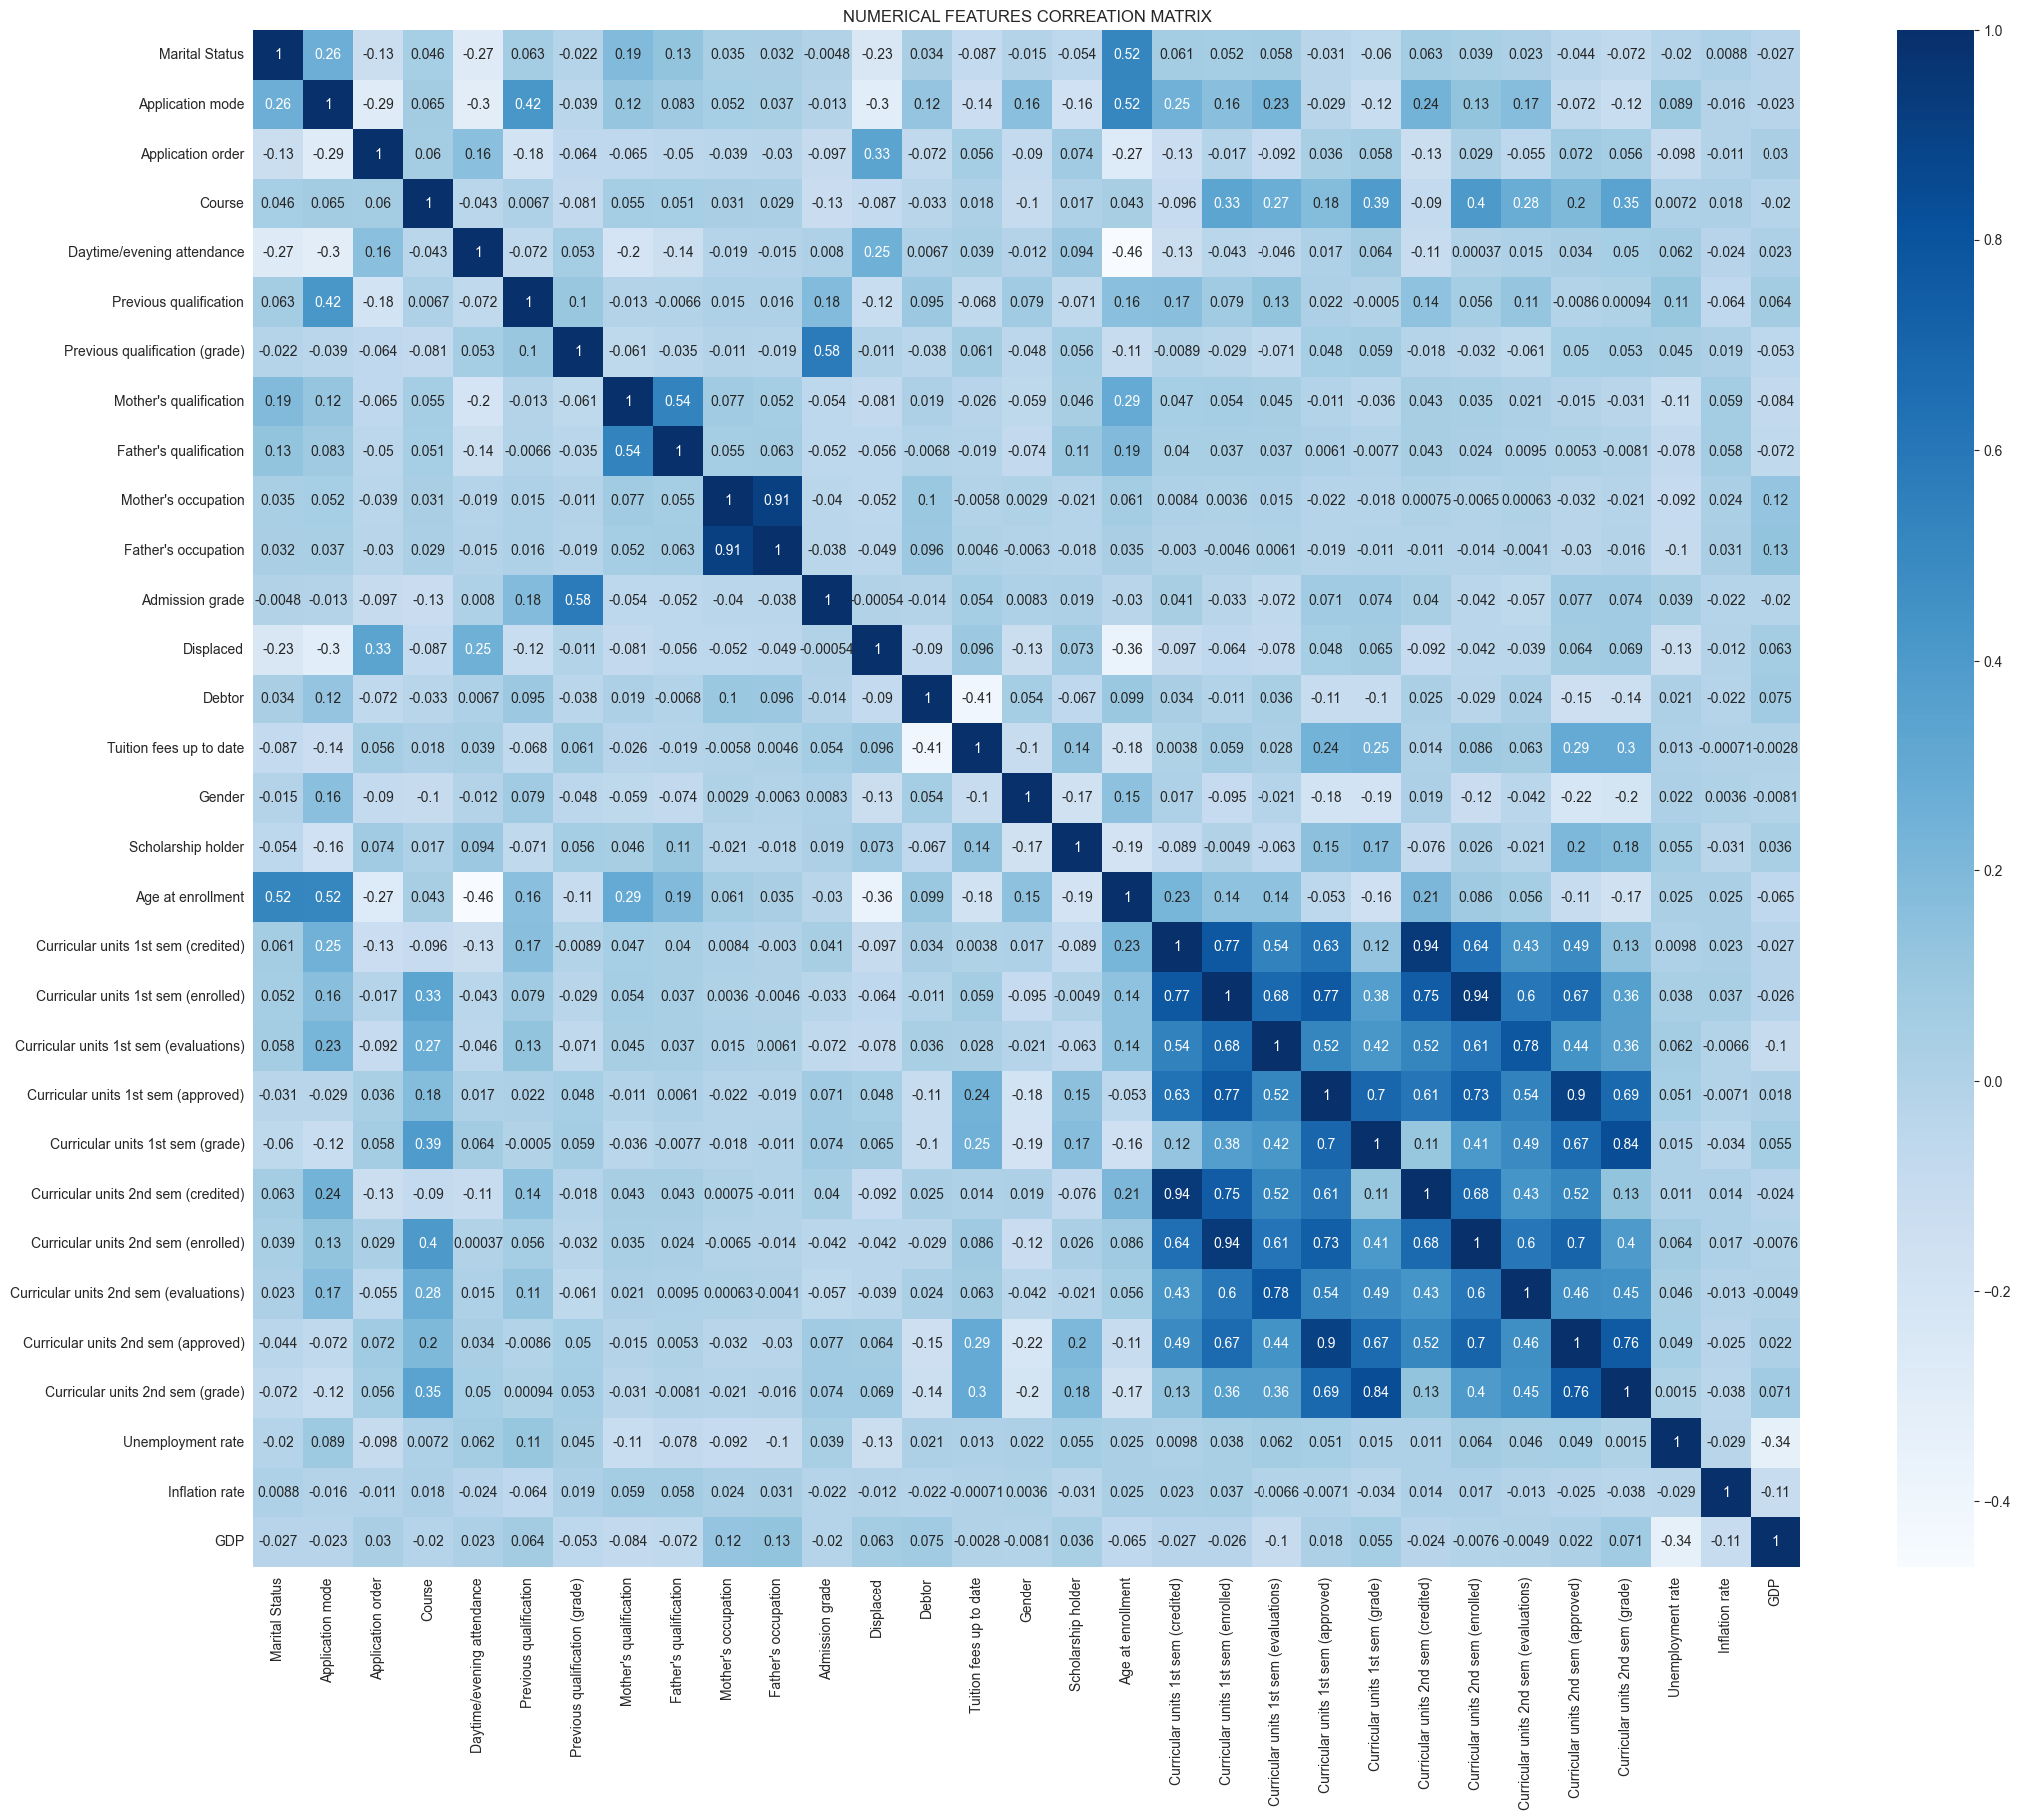

In [50]:
plt.figure(figsize=(25,20))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues')
plt.title('NUMERICAL FEATURES CORREATION MATRIX')
plt.show()

In [51]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [52]:
corr_matrix = df[numerical_cols].corr().abs()
to_drop = set()

In [53]:
print ('HIGH CORRELATION BETWEEN VARIABLES:')
print ('----------------------------------')
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.7:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            to_drop.add(colname2)
            print(f'HIGH CORRELATION BETWEEN "{colname1}" AND "{colname2}" ({corr_matrix.iloc[i, j]:.2f}), SUGGEST DELETE "{colname2}"')

df_reduced = df.drop(columns=list(to_drop))

print("\nCOLUMNS DELETED BY HIGH CORRELATION:")
print('--------------------------------------')
for col in to_drop:
    print(col)

print("\nFINAL NUMERICAL COLUMNS:")
print('-------------------------')
for col in df_reduced.select_dtypes(include=[np.number]).columns:
    print(col)

HIGH CORRELATION BETWEEN VARIABLES:
----------------------------------
HIGH CORRELATION BETWEEN "Father's occupation" AND "Mother's occupation" (0.91), SUGGEST DELETE "Mother's occupation"
HIGH CORRELATION BETWEEN "Curricular units 1st sem (enrolled)" AND "Curricular units 1st sem (credited)" (0.77), SUGGEST DELETE "Curricular units 1st sem (credited)"
HIGH CORRELATION BETWEEN "Curricular units 1st sem (approved)" AND "Curricular units 1st sem (enrolled)" (0.77), SUGGEST DELETE "Curricular units 1st sem (enrolled)"
HIGH CORRELATION BETWEEN "Curricular units 2nd sem (credited)" AND "Curricular units 1st sem (credited)" (0.94), SUGGEST DELETE "Curricular units 1st sem (credited)"
HIGH CORRELATION BETWEEN "Curricular units 2nd sem (credited)" AND "Curricular units 1st sem (enrolled)" (0.75), SUGGEST DELETE "Curricular units 1st sem (enrolled)"
HIGH CORRELATION BETWEEN "Curricular units 2nd sem (enrolled)" AND "Curricular units 1st sem (enrolled)" (0.94), SUGGEST DELETE "Curricular units 1

### **5. DEFINE KEY FEATURES**

In [54]:
key_numerical_cols = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

### **6. HANDLE OUTLIERS**

In [55]:
print("CHECKING FOR OUTLIERS IN KEY COLUMNS :")
print('-------------------------------------')

for col in key_numerical_cols:
    Q1 = df_reduced[col].quantile(0.25)
    Q3 = df_reduced[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_reduced[(df_reduced[col] < lower_bound) | (df_reduced[col] > upper_bound)]
    outlier_count = len(outliers)
    percentage = (outlier_count / len(df_reduced)) * 100
    
    print(f"{col}: {outlier_count} OUTLIERS ({percentage:.2f}%)")

CHECKING FOR OUTLIERS IN KEY COLUMNS :
-------------------------------------
Previous qualification (grade): 179 OUTLIERS (4.05%)
Admission grade: 86 OUTLIERS (1.94%)
Age at enrollment: 441 OUTLIERS (9.97%)
Curricular units 2nd sem (grade): 877 OUTLIERS (19.82%)
Unemployment rate: 0 OUTLIERS (0.00%)
Inflation rate: 0 OUTLIERS (0.00%)
GDP: 0 OUTLIERS (0.00%)


In [56]:
print ('OUTLIERS IMPUTED:')
print ('----------------')
for col in key_numerical_cols:
    Q1 = df_reduced[col].quantile(0.25)
    Q3 = df_reduced[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df_reduced[col].median()
    
    df_reduced[col] = df_reduced[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    print(f"OUTLIERS IMPUTED IN '{col}' WITH THE MEDIAN ({median}).")


OUTLIERS IMPUTED:
----------------
OUTLIERS IMPUTED IN 'Previous qualification (grade)' WITH THE MEDIAN (133.1).
OUTLIERS IMPUTED IN 'Admission grade' WITH THE MEDIAN (126.1).
OUTLIERS IMPUTED IN 'Age at enrollment' WITH THE MEDIAN (20.0).
OUTLIERS IMPUTED IN 'Curricular units 2nd sem (grade)' WITH THE MEDIAN (12.2).
OUTLIERS IMPUTED IN 'Unemployment rate' WITH THE MEDIAN (11.1).
OUTLIERS IMPUTED IN 'Inflation rate' WITH THE MEDIAN (1.4).
OUTLIERS IMPUTED IN 'GDP' WITH THE MEDIAN (0.32).


### **7. BIVARIANT ANALYSIS**

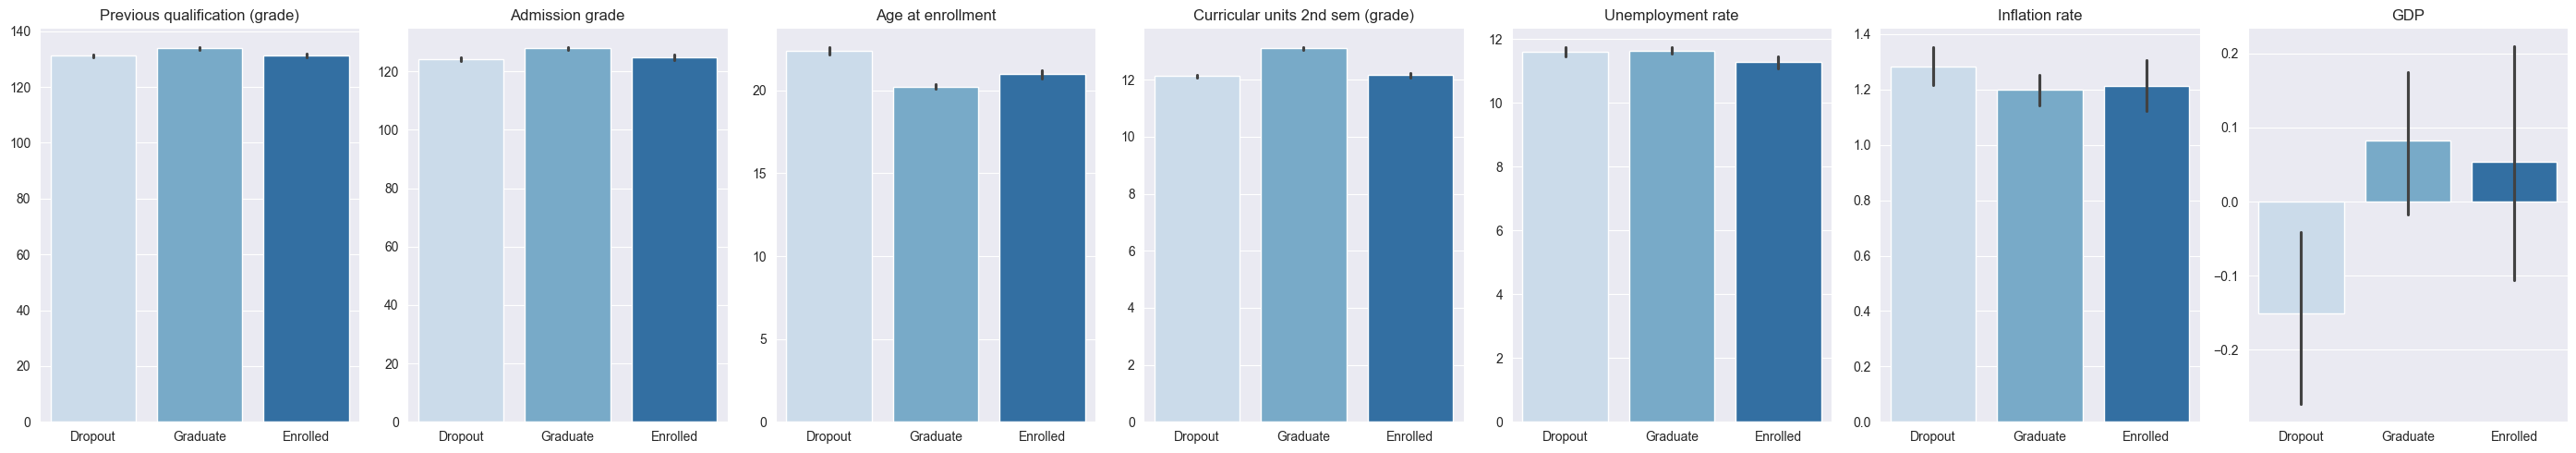

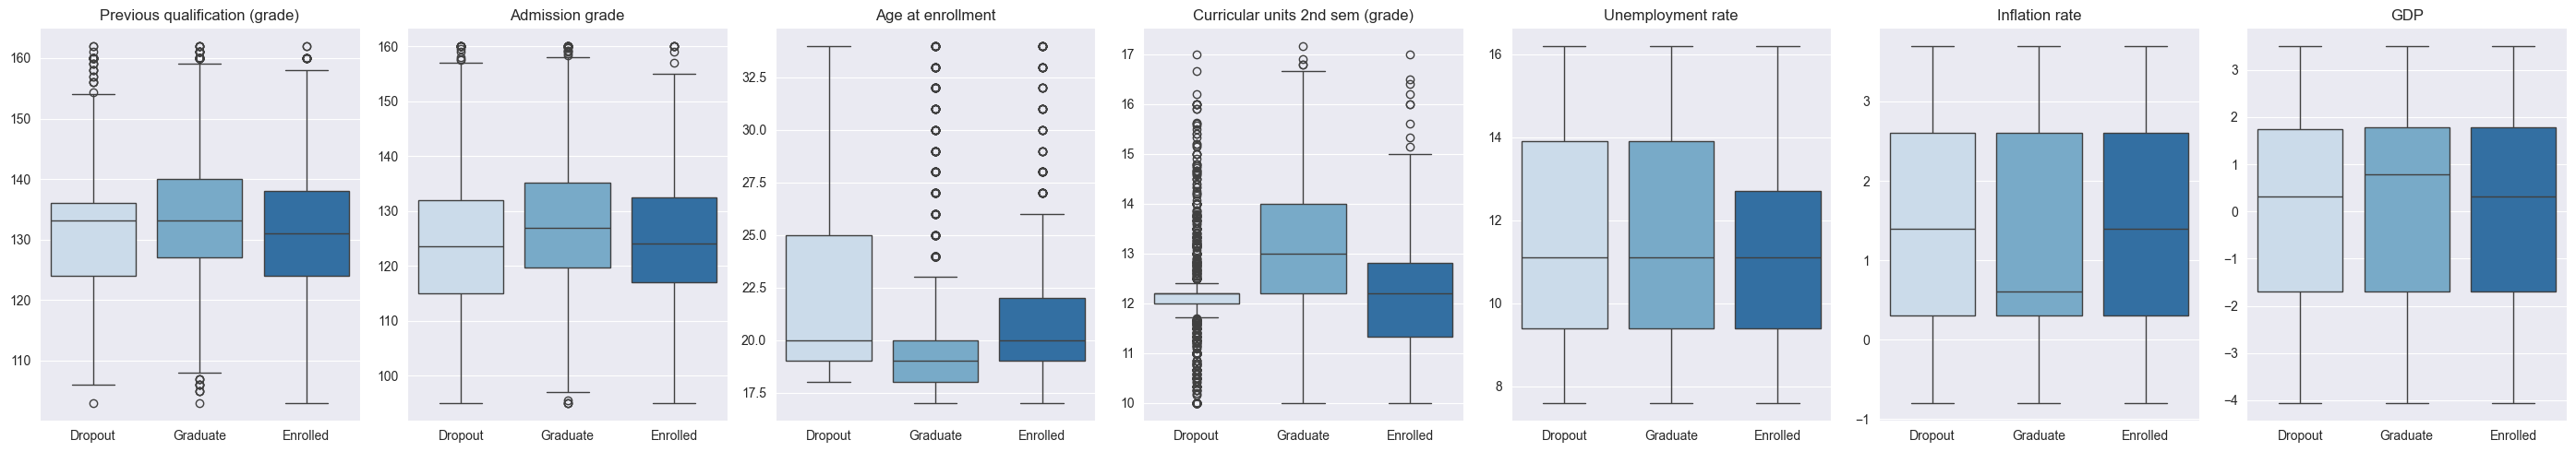

In [57]:
fig, axes = plt.subplots(1, len(key_numerical_cols), figsize=(4 * len(key_numerical_cols), 5), sharey=False)

for i, col in enumerate(key_numerical_cols):
    sns.barplot(x='target', y=col, data=df_reduced, ax=axes[i], palette='Blues')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(key_numerical_cols), figsize=(4 * len(key_numerical_cols), 5), sharey=False)
    
for i, col in enumerate(key_numerical_cols):
    sns.boxplot(x='target', y=col, data=df_reduced, ax=axes[i], palette='Blues')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [58]:
print ('BINARY FEATURES:')
print ('----------------')
[col for col in ['Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder'] if col in df_reduced.columns]

BINARY FEATURES:
----------------


['Displaced',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder']

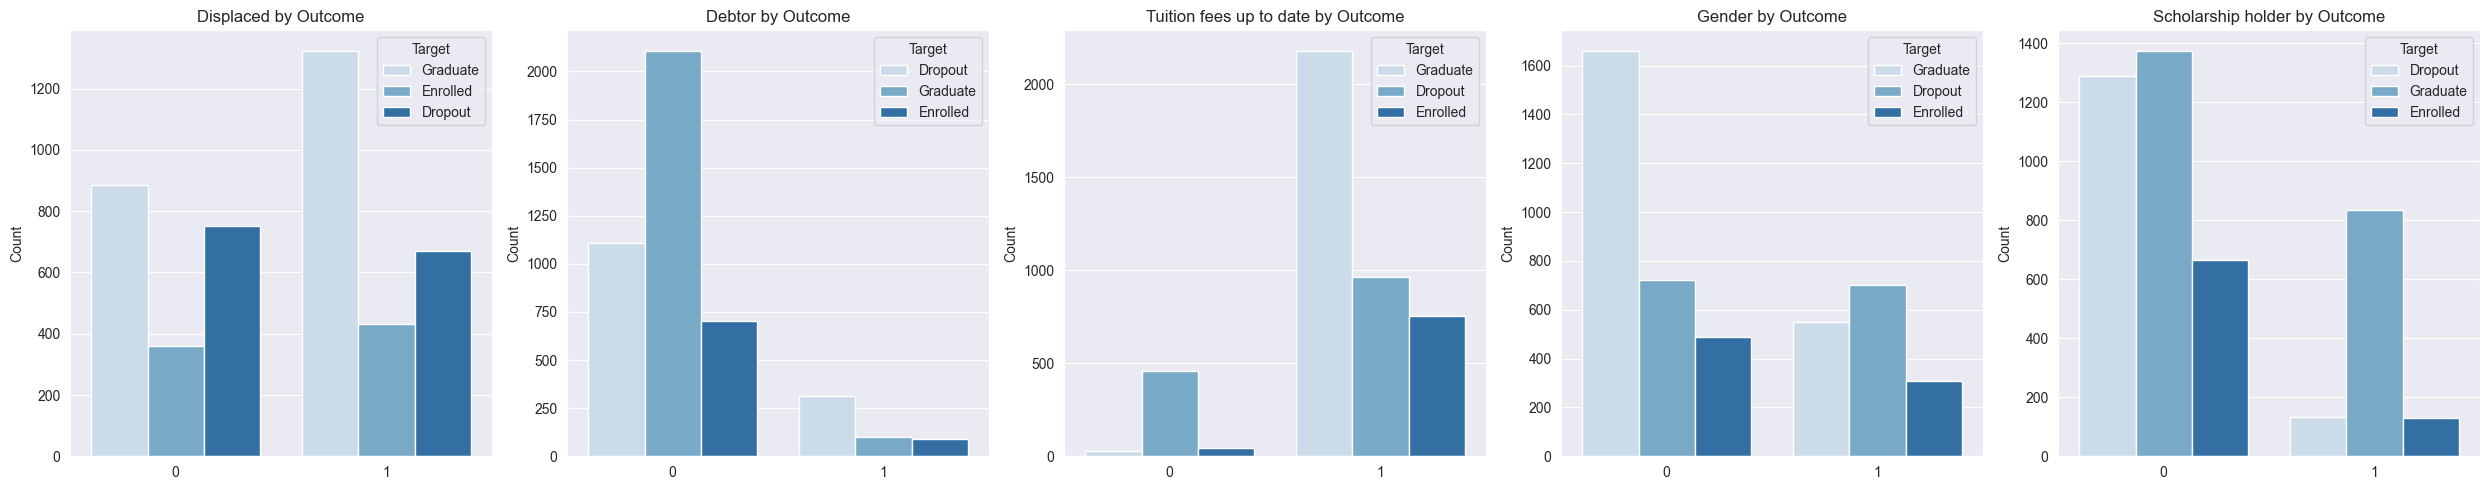

In [59]:
binary_cols = ['Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']

fig, axes = plt.subplots(1, len(binary_cols), figsize=(5 * len(binary_cols), 5), sharey=False)

for i, col in enumerate(binary_cols):
    sns.countplot(data=df_reduced, x=col, hue='target', ax=axes[i], palette='Blues')
    axes[i].set_title(f'{col} by Outcome')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target')

plt.tight_layout()
plt.show()


### **8. DEFINE CATEGORICAL FEATURES**

In [60]:
categorical_cols = df_reduced.select_dtypes(include='object').columns.tolist()

extra_cats = [
    'Marital Status',
    'Application mode',
    'Application order',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification',
    'Mother\'s qualification',
    'Father\'s qualification'
]

categorical_cols = list(set(categorical_cols + extra_cats))

print("FINAL CATEGORICAL FEATURES:")
print("--------------------------")
for col in categorical_cols:
    print(col)
    

FINAL CATEGORICAL FEATURES:
--------------------------
Daytime/evening attendance
Previous qualification
Course
Father's qualification
Application mode
Application order
Mother's qualification
Marital Status
target


In [61]:
print ('CATEGORICAL FEATURES UNIQUE VALUES:')
print ('----------------------------------')
for col in categorical_cols:
    print(f"{col}: {df_reduced[col].nunique()} UNIQUE VALUES")

CATEGORICAL FEATURES UNIQUE VALUES:
----------------------------------
Daytime/evening attendance: 2 UNIQUE VALUES
Previous qualification: 17 UNIQUE VALUES
Course: 17 UNIQUE VALUES
Father's qualification: 34 UNIQUE VALUES
Application mode: 18 UNIQUE VALUES
Application order: 8 UNIQUE VALUES
Mother's qualification: 29 UNIQUE VALUES
Marital Status: 6 UNIQUE VALUES
target: 3 UNIQUE VALUES


### **9. MAPING TARGET VARIABLE**

In [62]:
print ('TARGET MAPING:')
print ('-------------')
print ('Dropout: 0')
print ('Enrolled: 1')
print ('Graduate: 2')
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_reduced['target'] = df_reduced['target'].map(target_map)

TARGET MAPING:
-------------
Dropout: 0
Enrolled: 1
Graduate: 2


### **10. ENCODING CATEGORICAL FEATURES**

In [63]:
print ('LABEL ENCODING CATEGORICAL FEATURES....')
le = LabelEncoder()
for col in categorical_cols:
    df_reduced[col] = le.fit_transform(df_reduced[col])

LABEL ENCODING CATEGORICAL FEATURES....


### **11. FEATURES SELECTION** 

In [64]:
print ('FEATURES AND TARGET READY FOR THE MODEL!!')
X = df_reduced.drop('target', axis=1)
y = df_reduced['target']

FEATURES AND TARGET READY FOR THE MODEL!!


### **12. TRAIN TEST SPLIT**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"TRAINING SET: {X_train.shape[0]} SAMPLES")
print(f"TEST SET: {X_test.shape[0]} SAMPLES")

TRAINING SET: 3318 SAMPLES
TEST SET: 1106 SAMPLES


### **13. TRAINING AND EVALUATE ML MODELS**  

In [66]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} ACCURACY: {acc:.4f}")
    print ('-----------------------------------------------------')
    print(classification_report(y_test, y_pred, target_names=['Dropout', 'Enrolled', 'Graduate']))


Random Forest ACCURACY: 0.6944
-----------------------------------------------------
              precision    recall  f1-score   support

     Dropout       0.72      0.66      0.69       355
    Enrolled       0.46      0.25      0.32       199
    Graduate       0.72      0.88      0.79       552

    accuracy                           0.69      1106
   macro avg       0.63      0.60      0.60      1106
weighted avg       0.67      0.69      0.67      1106


XGBoost ACCURACY: 0.6962
-----------------------------------------------------
              precision    recall  f1-score   support

     Dropout       0.75      0.67      0.71       355
    Enrolled       0.44      0.36      0.40       199
    Graduate       0.73      0.84      0.78       552

    accuracy                           0.70      1106
   macro avg       0.64      0.62      0.63      1106
weighted avg       0.69      0.70      0.69      1106



### **14. FEATURE IMPORTANCES**

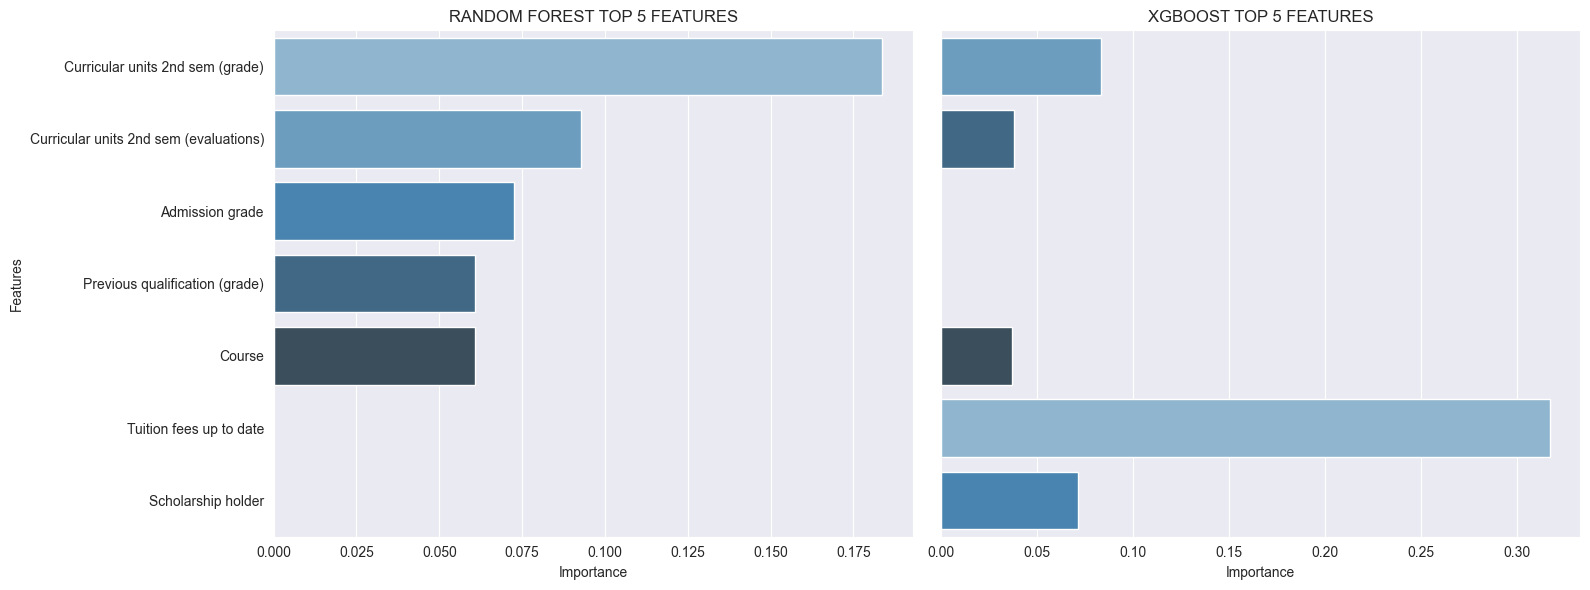

In [67]:
rf_importances = models['Random Forest'].feature_importances_
xgb_importances = models['XGBoost'].feature_importances_

rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False).head(5)

xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False).head(5)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.barplot(data=rf_df, x='Importance', y='Feature', ax=axes[0], palette='Blues_d')
axes[0].set_title('RANDOM FOREST TOP 5 FEATURES')
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Features')

sns.barplot(data=xgb_df, x='Importance', y='Feature', ax=axes[1], palette='Blues_d')
axes[1].set_title('XGBOOST TOP 5 FEATURES')
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### **15. CONFUSION MATRIX**

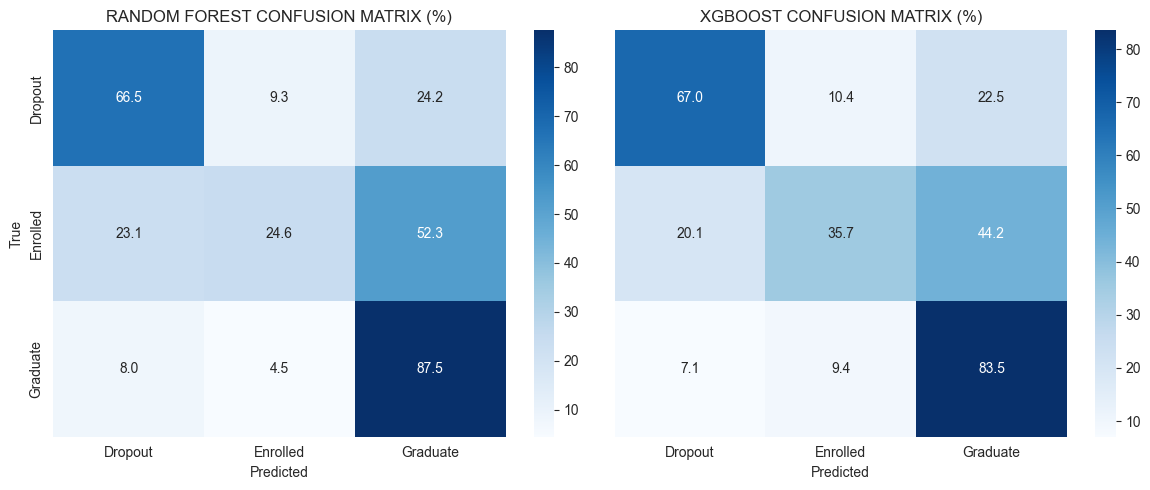

In [68]:
labels = ['Dropout', 'Enrolled', 'Graduate']

y_pred_rf = models['Random Forest'].predict(X_test)
y_pred_xgb = models['XGBoost'].predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf_percent = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis] * 100

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb_percent = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis] * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.heatmap(cm_rf_percent, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('RANDOM FOREST CONFUSION MATRIX (%)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_xgb_percent, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('XGBOOST CONFUSION MATRIX (%)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# **| TECHNICAL INSIGHTS |**

## 🧠 Realistic Analysis of the Confusion Matrix Charts (Random Forest vs XGBoost)

### 🎓 Context:
Working with three classes of students:

- **Dropout** (they leave the program)  
- **Enrolled** (still active)  
- **Graduate** (they finish their studies)

I trained two models (Random Forest and XGBoost) and comparing how well each one predicts students final outcomes.

---

### 🔹 RANDOM FOREST

**Graduate → 88% correctly predicted**  
🔥 That’s outstanding. The model clearly understands what kind of profile leads to graduation. This is its strongest point.

**Dropout → 66% correctly predicted**  
Also solid. Two out of three dropouts are detected correctly.  
But **23% are misclassified as graduates** 😐  
👉 What does that mean? Some students seem to have good grades or favorable conditions... but still drop out. Possibly due to **factors not reflected in the data** — personal issues, finances, emotional struggles, etc.

**Enrolled → only 25% correctly predicted**  
🧊 This is the real weak spot.  
More than half of currently enrolled students are predicted **as if they’ve already graduated**.  
➕ This shows their academic profile is **very similar to successful students**, but they’re just not done yet.  
📌 They’re probably in the middle of the process, and that’s why the model gets confused.

---

### 🔸 XGBOOST

**Graduate → 84% correctly predicted**  
Slightly lower than RF, but still very strong. The model continues to recognize those who make it through.

**Dropout → 67% correctly predicted**  
Very similar to RF — not much difference here.

**Enrolled → 36% correctly predicted**  
🔥 Clear improvement over RF (from 25% → 36%).  
Now the model is better at detecting students who are **still in the system** and haven’t dropped out or graduated.

➡️ This matters: XGBoost seems to capture more nuanced student behavior.  
It’s more sensitive to the **in-between state** — distinguishing someone who’s still progressing from someone who has finished.





# **| STORY TELLING WITH OUR DATA |**

## 🎓 What Is Happening with These Students?  
(The story the data is really telling us)

### 🟢 **Graduated Students**

These students are the most easily identifiable group.  
They show a consistent path, meet expectations, **maintain solid grades**, and move forward steadily.

The models recognize them easily because they likely:

- Have no outstanding debts.
- Keep their tuition payments up to date.
- Pass their courses with good grades.
- Come from a stable academic and personal environment.

🧠 In real terms:  
These are the “model” students. They probably came in well-prepared, have clear goals, and **nothing stops them**.

---

### 🔴 **Dropout Students**

This group also follows a fairly recognizable pattern:  
They often **start with visible difficulties** — low grades, debt, poor course performance.

But here's something more interesting:  
Some of them **look very similar to the graduates**, at least on paper. That is, they had good grades, no financial issues… and still dropped out.

💥 What does this tell us?

- Some dropouts are **not due to academic performance**.
- There are likely external factors we can’t see in the data: mental health, work obligations, personal crises, lack of motivation.

🧠 These are the students who are hardest to support from within the system, because **everything seems fine… until they disappear**.

---

### 🟡 **Enrolled Students**

This is the most mysterious group. And it’s the one where the models make the most mistakes.

Why?

Because these students **haven’t failed, but haven’t succeeded yet either**.

They’re a gray area:
- Many of them resemble graduates (decent grades, no debts).
- Others show irregular progress, as if they’re on the verge of dropping out.

🔁 What does this look like in real life?

- Students **fighting to move forward**, but with ups and downs.
- Some are **stuck in certain courses**, repeating subjects, or struggling with motivation or money.
- Others simply **need more time** to finish.

🧠 This group represents **uncertainty**: students still in the game, still figuring out if they'll finish or give up.

---

### 💡 Final Reflection

These charts aren’t just predictions —  
**they tell a real story of inequality, effort, and diverging student journeys**.

- 🎯 Some students have all the tools to succeed — and they do.
- 🚫 Others seem fine on the surface, but fall through the cracks for unseen reasons.
- ⏳ And then there are those still walking the line between finishing and quitting, waiting for their story to unfold.


###### ADRIÁN ZAMBRANA | MAY 2025